In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import csv
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.impute import SimpleImputer

%matplotlib inline
import ipynb.fs.defs.functions as func

In [2]:
register_matplotlib_converters()
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('pd_speech_features.csv', sep=",", decimal='.', header=[0,1])
data.head(5)

,Unnamed: 0_level_0,Unnamed: 1_level_0,Baseline Features,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Intensity Parameters,Unnamed: 24_level_0,Unnamed: 25_level_0,Formant Frequencies,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Bandwidth Parameters,Unnamed: 31_level_0,Unnamed: 32_level_0,Unnamed: 33_level_0,Vocal Fold,Unnamed: 35_level_0,Unnamed: 36_level_0,Unnamed: 37_level_0,Unnamed: 38_level_0,Unnamed: 39_level_0,Unnamed: 40_level_0,Unnamed: 41_level_0,Unnamed: 42_level_0,Unnamed: 43_level_0,Unnamed: 44_level_0,Unnamed: 45_level_0,Unnamed: 46_level_0,Unnamed: 47_level_0,Unnamed: 48_level_0,Unnamed: 49_level_0,Unnamed: 50_level_0,Unnamed: 51_level_0,Unnamed: 52_level_0,Unnamed: 53_level_0,Unnamed: 54_level_0,Unnamed: 55_level_0,MFCC,Unnamed: 57_level_0,Unnamed: 58_level_0,Unnamed: 59_level_0,Unnamed: 60_level_0,Unnamed: 61_level_0,Unnamed: 62_level_0,Unnamed: 63_level_0,Unnamed: 64_level_0,Unnamed: 65_level_0,Unnamed: 66_level_0,Unnamed: 67_level_0,Unnamed: 68_level_0,Unnamed: 69_level_0,Unnamed: 70_level_0,Unnamed: 71_level_0,Unnamed: 72_level_0,Unnamed: 73_level_0,Unnamed: 74_level_0,Unnamed: 75_level_0,Unnamed: 76_level_0,Unnamed: 77_level_0,Unnamed: 78_level_0,Unnamed: 79_level_0,Unnamed: 80_level_0,Unnamed: 81_level_0,Unnamed: 82_level_0,Unnamed: 83_level_0,Unnamed: 84_level_0,Unnamed: 85_level_0,Unnamed: 86_level_0,Unnamed: 87_level_0,Unnamed: 88_level_0,Unnamed: 89_level_0,Unnamed: 90_level_0,Unnamed: 91_level_0,Unnamed: 92_level_0,Unnamed: 93_level_0,Unnamed: 94_level_0,Unnamed: 95_level_0,Unnamed: 96_level_0,Unnamed: 97_level_0,Unnamed: 98_level_0,Unnamed: 99_level_0,Unnamed: 100_level_0,Unnamed: 101_level_0,Unnamed: 102_level_0,Unnamed: 103_level_0,Unnamed: 104_level_0,Unnamed: 105_level_0,Unnamed: 106_level_0,Unnamed: 107_level_0,Unnamed: 108_level_0,Unnamed: 109_level_0,Unnamed: 110_level_0,Unnamed: 111_level_0,Unnamed: 112_level_0,Unnamed: 113_level_0,Unnamed: 114_level_0,Unnamed: 115_level_0,Unnamed: 116_level_0,Unnamed: 117_level_0,Unnamed: 118_level_0,Unnamed: 119_level_0,Unnamed: 120_level_0,Unnamed: 121_level_0,Unnamed: 122_level_0,Unnamed: 123_level_0,Unnamed: 124_level_0,Unnamed: 125_level_0,Unnamed: 126_level_0,Unnamed: 127_level_0,Unnamed: 128_level_0,Unnamed: 129_level_0,Unnamed: 130_level_0,Unnamed: 131_level_0,Unnamed: 132_level_0,Unnamed: 133_level_0,Unnamed: 134_level_0,Unnamed: 135_level_0,Unnamed: 136_level_0,Unnamed: 137_level_0,Unnamed: 138_level_0,Unnamed: 139_level_0,Wavelet Features,Unnamed: 141_level_0,Unnamed: 142_level_0,Unnamed: 143_level_0,Unnamed: 144_level_0,Unnamed: 145_level_0,Unnamed: 146_level_0,Unnamed: 147_level_0,Unnamed: 148_level_0,Unnamed: 149_level_0,Unnamed: 150_level_0,Unnamed: 151_level_0,Unnamed: 152_level_0,Unnamed: 153_level_0,Unnamed: 154_level_0,Unnamed: 155_level_0,Unnamed: 156_level_0,Unnamed: 157_level_0,Unnamed: 158_level_0,Unnamed: 159_level_0,Unnamed: 160_level_0,Unnamed: 161_level_0,Unnamed: 162_level_0,Unnamed: 163_level_0,Unnamed: 164_level_0,Unnamed: 165_level_0,Unnamed: 166_level_0,Unnamed: 167_level_0,Unnamed: 168_level_0,Unnamed: 169_level_0,Unnamed: 170_level_0,Unnamed: 171_level_0,Unnamed: 172_level_0,Unnamed: 173_level_0,Unnamed: 174_level_0,Unnamed: 175_level_0,Unnamed: 176_level_0,Unnamed: 177_level_0,Unnamed: 178_level_0,Unnamed: 179_level_0,Unnamed: 180_level_0,Unnamed: 181_level_0,Unnamed: 182_level_0,Unnamed: 183_level_0,Unnamed: 184_level_0,Unnamed: 185_level_0,Unnamed: 186_level_0,Unnamed: 187_level_0,Unnamed: 188_level_0,Unnamed: 189_level_0,Unnamed: 190_level_0,Unnamed: 191_level_0,Unnamed: 192_level_0,Unnamed: 193_level_0,Unnamed: 194_level_0,Unnamed: 195_level_0,Unnamed: 196_level_0

In [4]:
# Rename the columns for a more appealing view
prev_col_name = ''
column_names = []
for c in data.columns:
    if not c[0].startswith('Unnamed'):
        prev_col_name = c[0]
    column_names.append(f'{prev_col_name}-{c[1]}')
column_names[-1] = 'class'
data.columns = column_names

In [5]:
data.head()

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

## Single Variable Analysis

In [6]:
# Top variables with missing values:
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()

top_missing = sorted(mv.items(), key=operator.itemgetter(1), reverse=True)
if any([nb_missing for nb_missing in mv.values()]):
    print(top_missing)
else:
    print('No missing values in the whole dataset!')

No missing values in the whole dataset!


In [7]:
# Very informative...
data.describe()

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

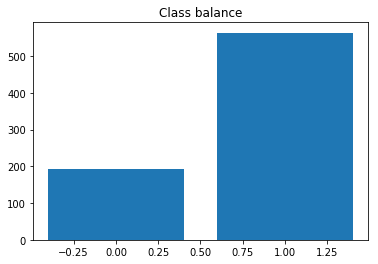

Minority class: 564
Majority class: 192
Proportion: 2.94 : 1


In [8]:
y = data[['class']]

target_count = pd.value_counts(y.values.flatten())
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

## As we don't know much about the variables and it's would be almost impossible to analyze the behaviour of all the 755 variables let's select some important ones and do exploratory analysis on them

#### Let's explore the correlation between those variables and remove some that are very correlated within the classes

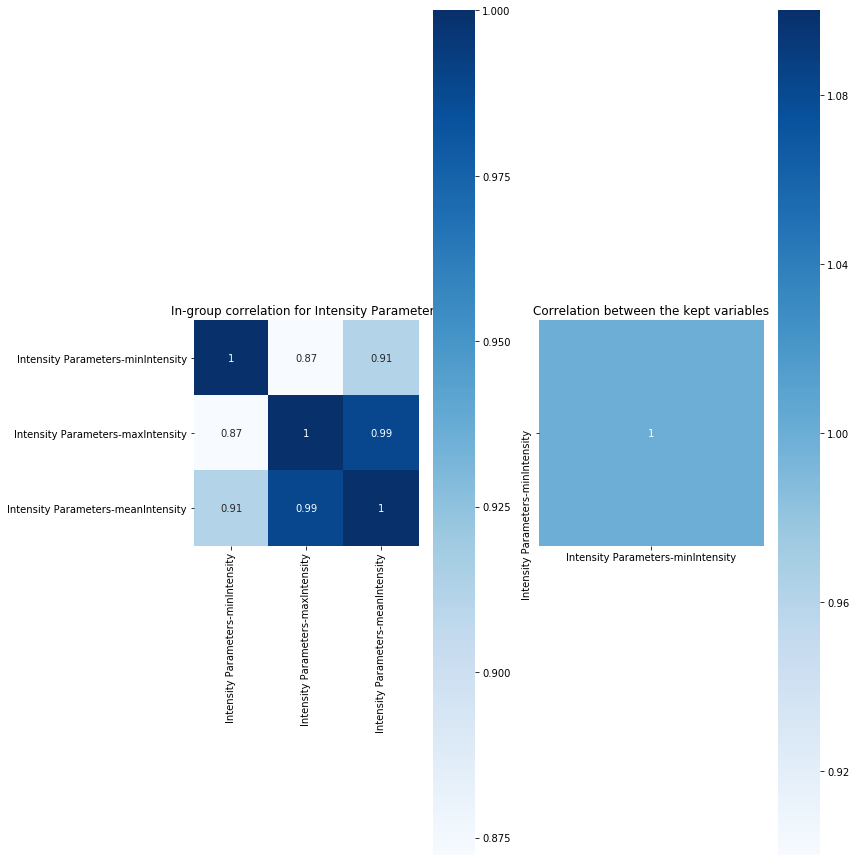

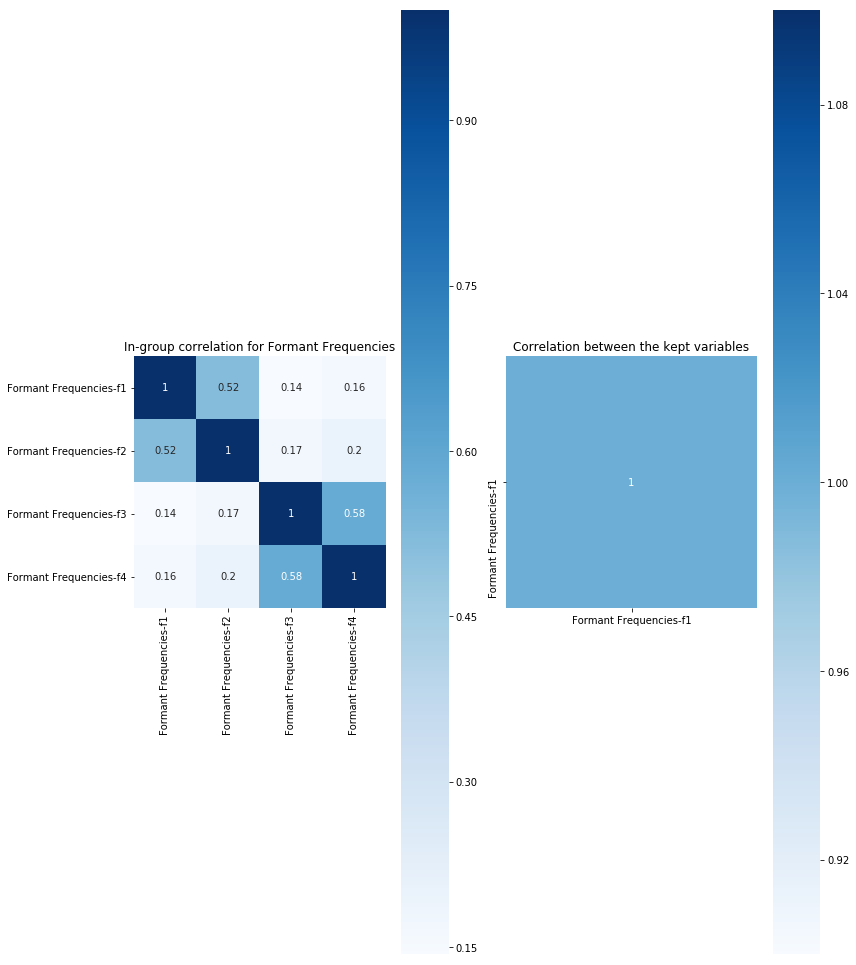

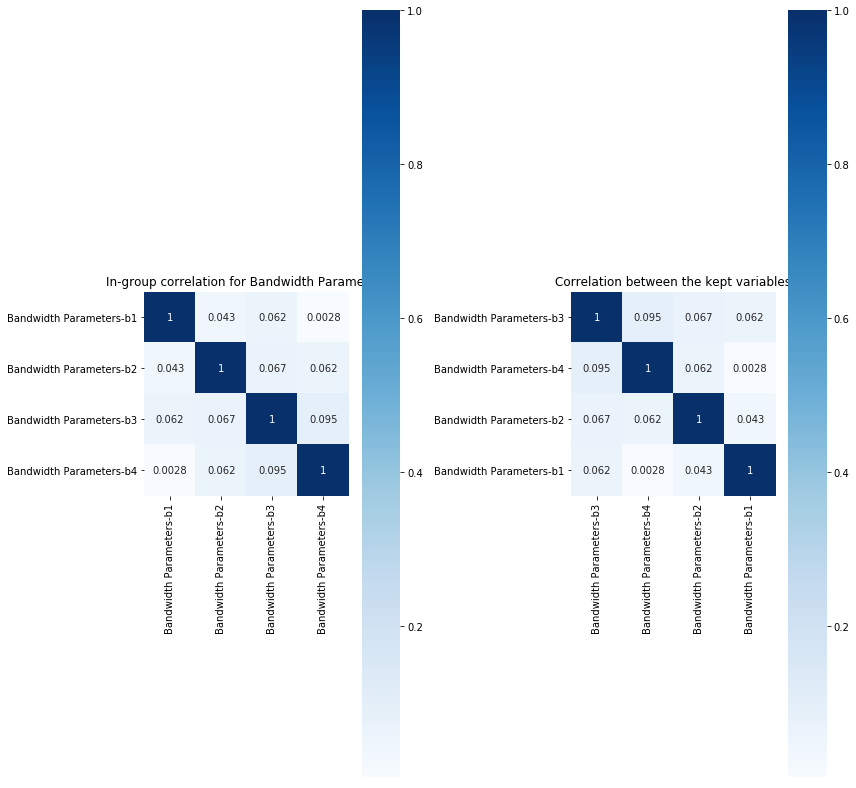

(756, 17)


,-id,Baseline Features-DFA,Baseline Features-PPE,Intensity Parameters-minIntensity,Formant Frequencies-f1,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Bandwidth Parameters-b2,Bandwidth Parameters-b1,Vocal Fold-GQ_prc5_95,MFCC -mean_12th_delta,MFCC -mean_Log_energy,Wavelet Features-Ea,TQWT Features-tqwt_medianValue_dec_26,TQWT Features-tqwt_skewnessValue_dec_3,TQWT Features-tqwt_energy_dec_1,class
0,0,0.71826,0.85247,69.997496,539.342735,255.214830,396.643631,83.147440,101.092218,0.77778,-0.001187,9.1817,99.9996,-2.220000e-17,1.110000e-15,0.000011,1
1,0,0.69481,0.76686,67.415903,564.363614,248.357127,218.229722,86.487292,58.465428,0.81250,0.002505,9.6074,99.9998,-3.790000e-17,-3.290000e-15,0.000028,1
2,0,0.67604,0.85083,62.661706,548.444604,151.694847,84.240339,54.685168,160.387771,0.81818,-0.000470,9.0512,99.9999,-1.580000e-17,-3.420000e-15,0.000034,1
3,1,0.79672,0.41121,76.306989,819.529588,573.752909,526.147599,191.984916,238.667052,0.98548,0.001058,9.8453,99.0823,1.105400e-03,6.455000e-02,0.000051,1
4,1,0.79782,0.32790,76.645686,846.796144,203.637106,384.611697,210.061394,402.216738,0.97847,-0.001325,10.1542,98.6930,8.909500e-03,-4.187600e-03,0.000044,1


In [9]:
def get_important_column_names(df, correlation_threshold=0):
    superclasses = list(dict.fromkeys([c.split('-')[0] for c in df.columns]))
    groups = {c: [] for c in superclasses}
    for c in df.columns:
        groups[c.split('-')[0]].append(c)
    
    important_columns = []
    for i, (group_name, columns) in enumerate(groups.items()):
        corr_matrix = df[columns].corr().abs()                                               # Calculate the correlation within group
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
        to_keep = list(set(columns) - set(to_drop))
        important_columns += to_keep
        
        # Plot the correlation
        if i == 0 or i == len(groups.values()) - 1 or len(columns) > 10:
            continue
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 30))
        axes[0].set_title(f'In-group correlation for {group_name}')
        sns.heatmap(corr_matrix, ax=axes[0], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
        corr_matrix = df[to_keep].corr().abs()
        axes[1].set_title('Correlation between the kept variables')
        sns.heatmap(corr_matrix, ax=axes[1], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
        fig.tight_layout()
        plt.show()
    return important_columns

        
importants = get_important_column_names(data, correlation_threshold=0.1)
importants = data[importants]
print(importants.shape)
importants.head()

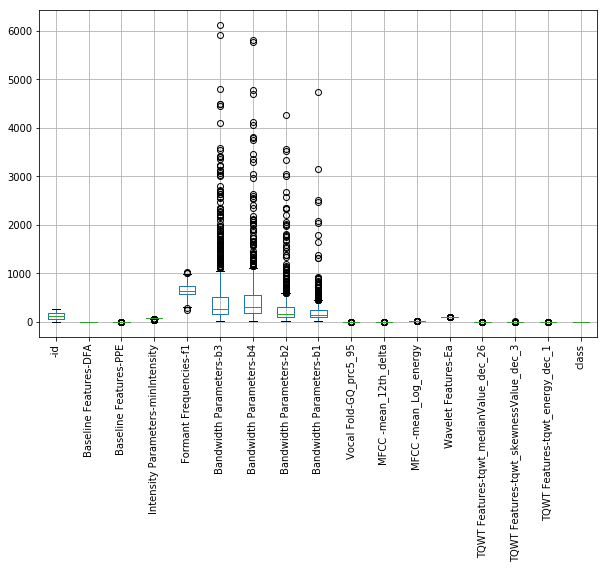

In [10]:
importants.boxplot(figsize=(10,6), rot=90)
plt.show()
# A terrible box plot cause the values are of totally different scale
# Let's see the values one by one separately
# If you guys can figure something out on how to display this it would be nice

<Figure size 432x288 with 0 Axes>

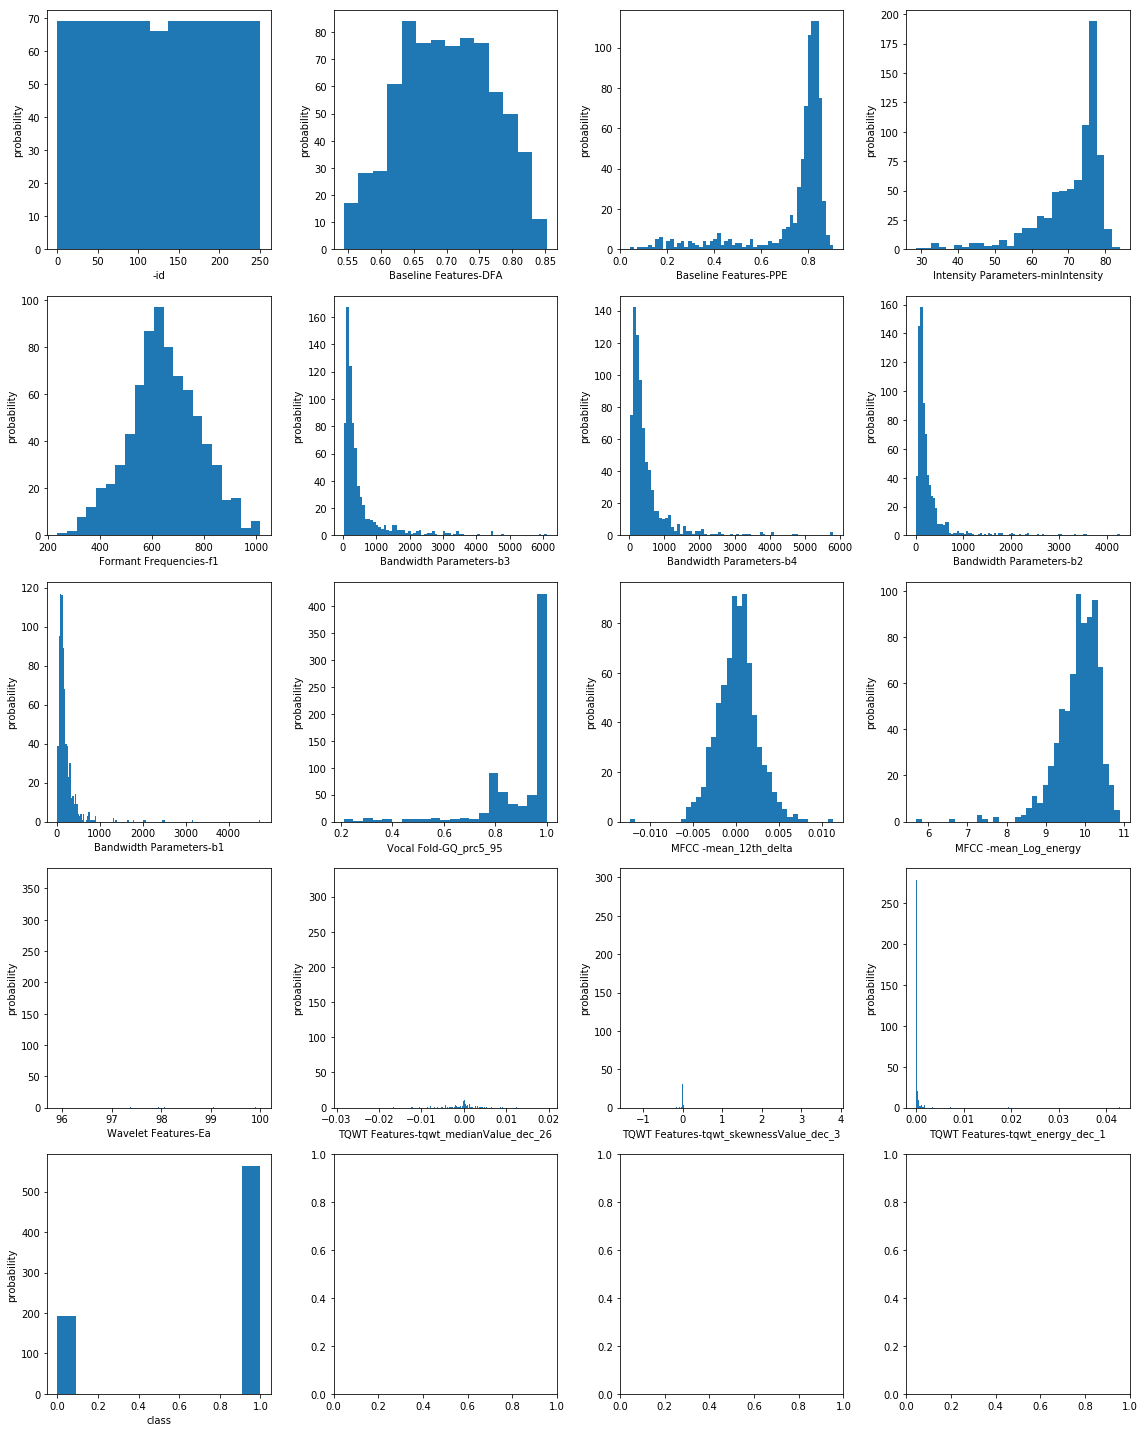

In [11]:
columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("probability")
    axs[i, j].hist(data[columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

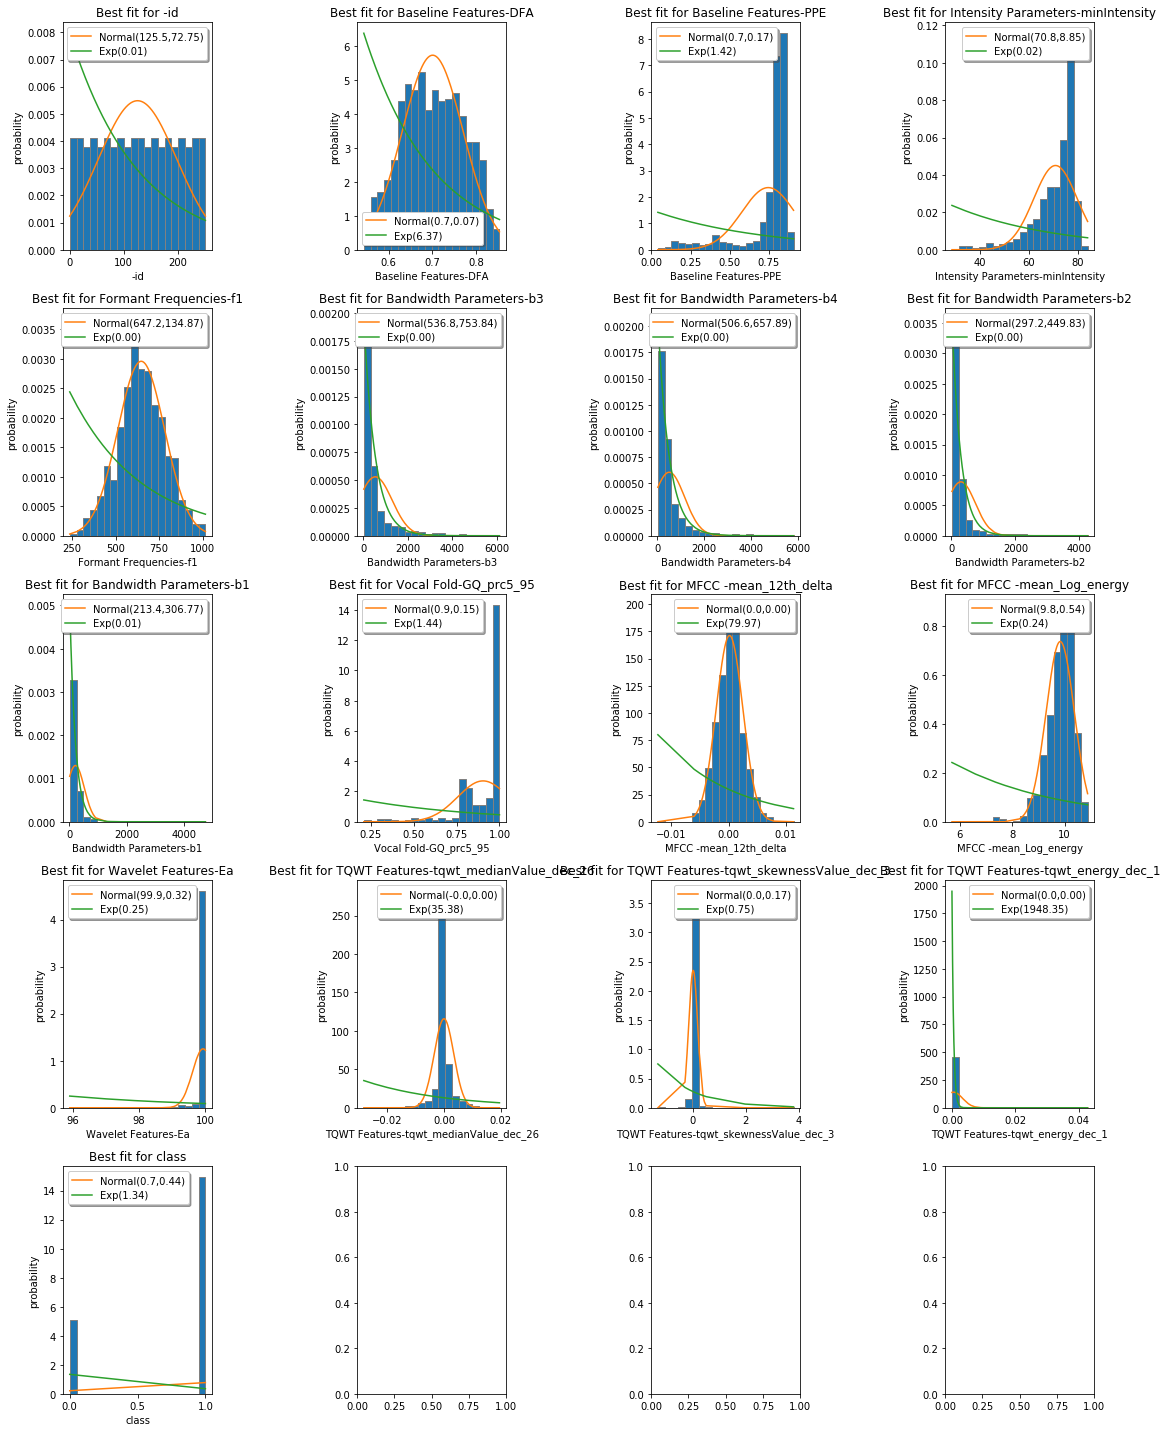

In [12]:
import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    func.multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')

columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

## Multi-Variate Analysis
##### Again, as the dataset is too large in terms of the number of columns, we will concentrate on the variables that are important based the previous findings

/Users/martin/Library/Python/3.7/lib/python/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


<Figure size 432x288 with 0 Axes>

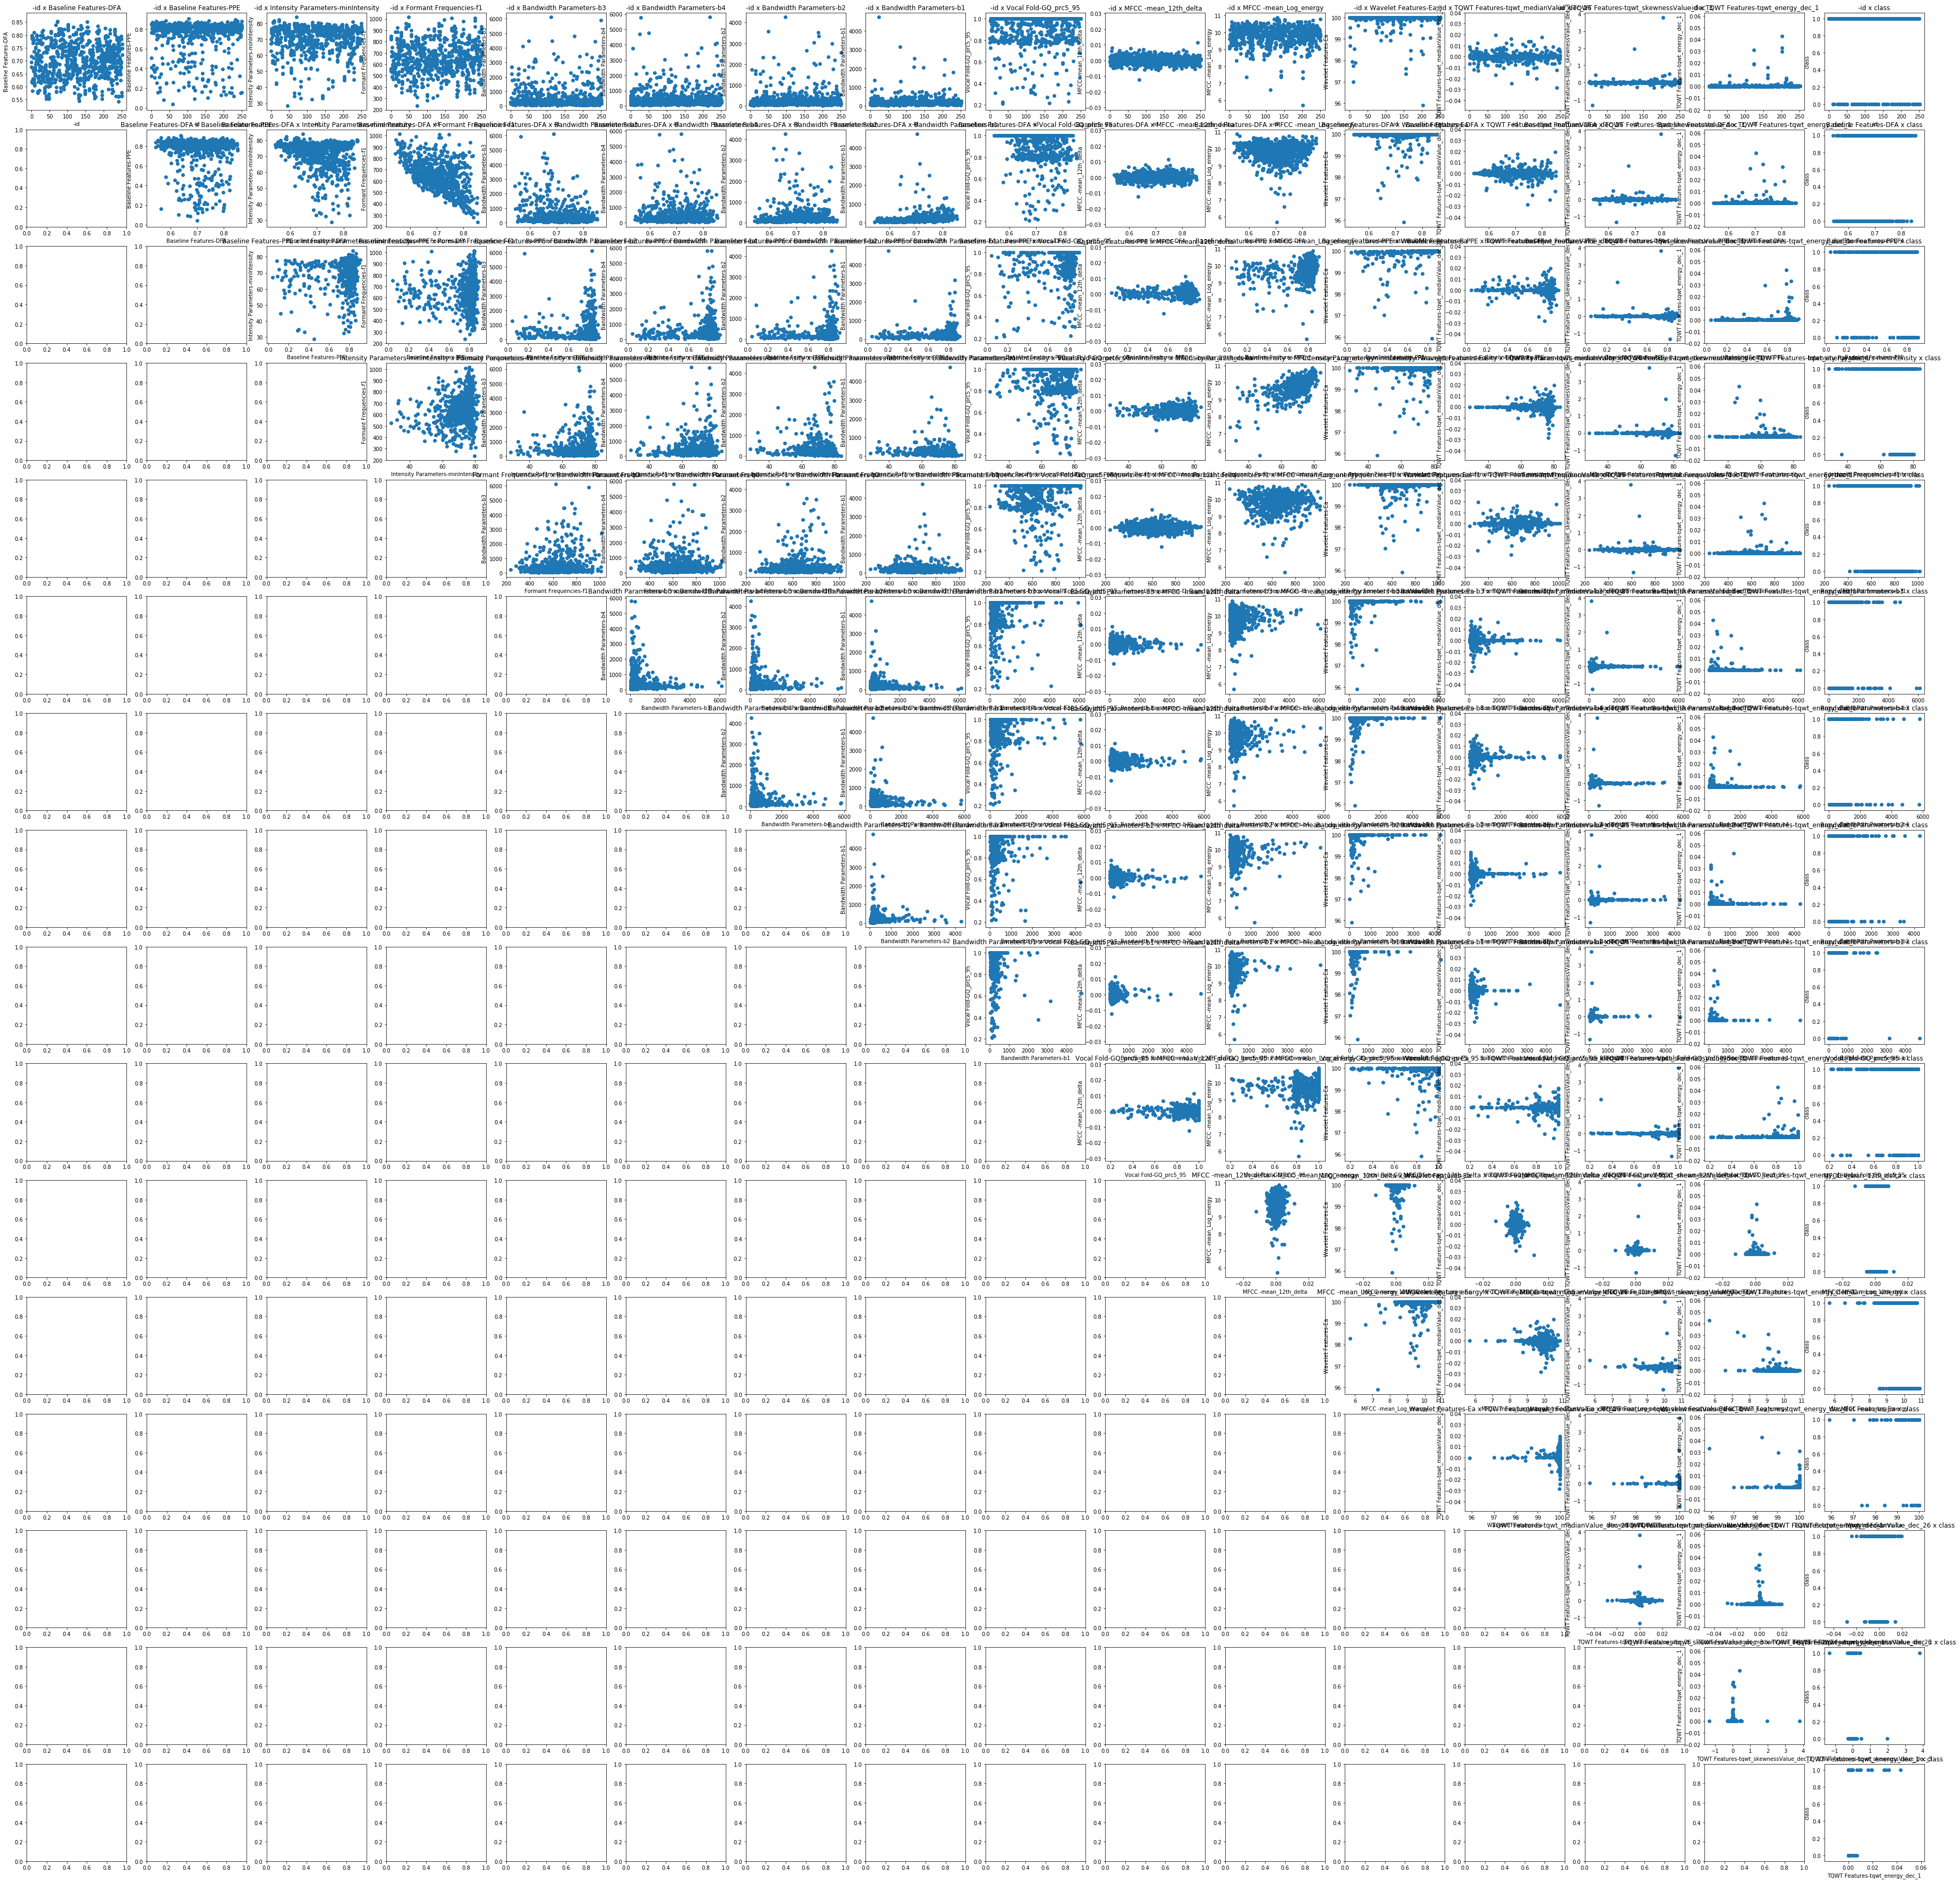

In [13]:
columns = importants.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

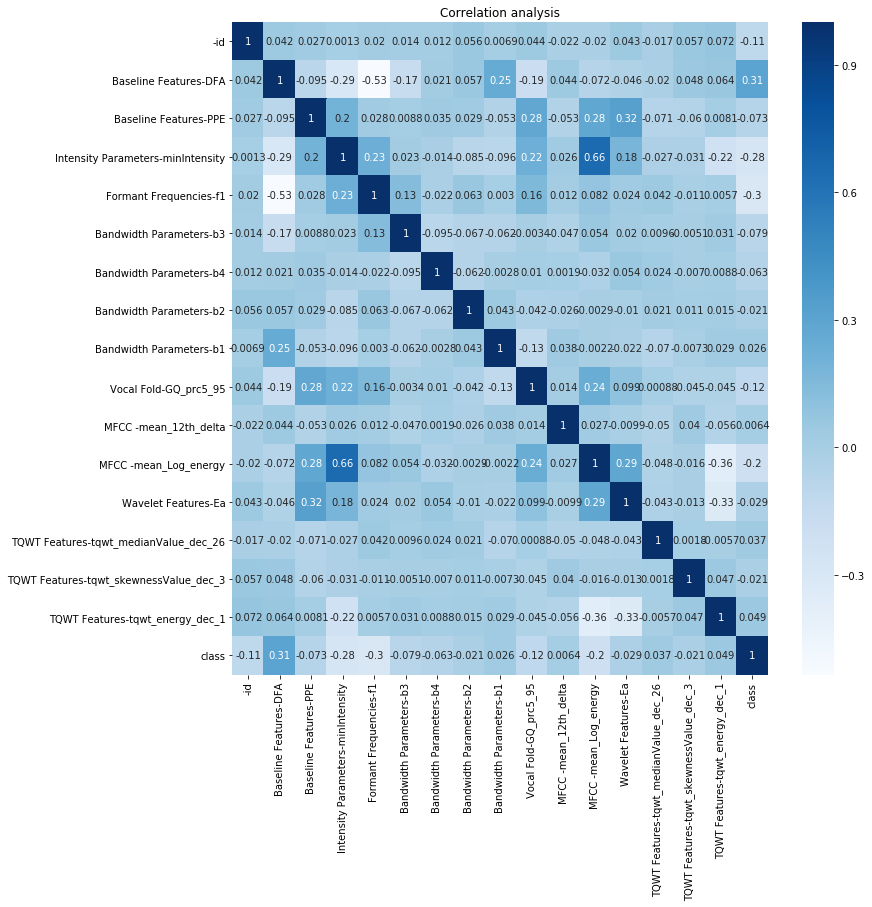

In [14]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = importants.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

## Classification

In [15]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## 0. Data split

In [16]:
X = importants.loc[:, ~importants.columns.isin(['class'])]
y = importants.loc[:, importants.columns.isin(['class'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Naive bayes

              precision    recall  f1-score   support

           0       0.43      0.69      0.53        61
           1       0.85      0.67      0.75       166

   micro avg       0.67      0.67      0.67       227
   macro avg       0.64      0.68      0.64       227
weighted avg       0.74      0.67      0.69       227

Accuracy: 0.6740088105726872


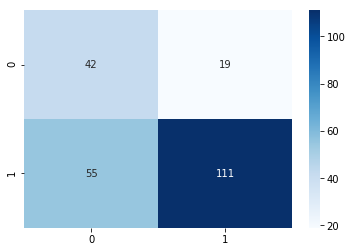

In [17]:
clf = GaussianNB()
clf.fit(X_train, y_train.values.flatten())
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_mtx, annot=True, cmap='Blues', fmt='g')

### 2. KNN

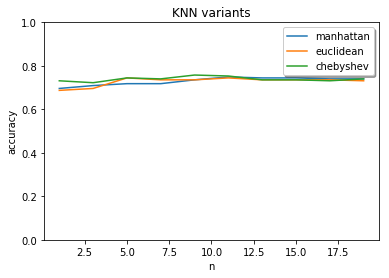

In [18]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train.values.flatten())
        y_pred = knn.predict(X_test)
        yvalues.append(metrics.accuracy_score(y_test, y_pred))
    values[d] = yvalues

plt.figure()
func.multiple_line_chart(plt.gca(), nvalues, values, 'KNN variants', 'n', 'accuracy', percentage=True)
plt.show()

## 3. Decision Tree

In [19]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.775330396475771
